In [562]:
%matplotlib inline
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

noOfStates = 99
goal = 100
coinTossProb = 0.7

In [563]:
def coinToss():
    if random.random() < coinTossProb:
        return True
    return False

In [564]:
def getNumOfActions(stateVal):
    return min(stateVal, goal - stateVal)

In [565]:
def getReward(stateValue):
    # Adding negative value to out of captital. 
    if stateValue == goal:
        return 1
#     if stateValue == 0:
#         return -1
    return 0

In [566]:
def getMaxActionValue(stateVal, V):
    maxActionVal = -1000
    maxAction = -100
    numOfActions = getNumOfActions(stateVal)
    for action in range(1,numOfActions+1):
        # Check this bound
        sucState1 = stateVal + action
        sucState2 = stateVal - action
        actionVal = (coinTossProb * (getReward(sucState1) + V[sucState1])) + \
            ((1-coinTossProb) * (getReward(sucState2) + V[sucState2]))
#         print "Action Vale for %s is %s" % (action, actionVal)
        
        if(float("{0:.12f}".format(actionVal)) > float("{0:.12f}".format(maxActionVal))):
            maxActionVal = actionVal
            maxAction = action
    return (maxActionVal, maxAction)

In [567]:
def getOptimalPolicy(V):
    optimalPolicy = []
    for i in range(1,noOfStates+1):
        _, maxAction = getMaxActionValue(i, V)
        optimalPolicy.append(maxAction)
    return optimalPolicy

In [568]:
def valueIterations():
    V = [0]*(noOfStates+1+1)
    minVal = pow(10,-20)
    
    print minVal
    delta = 0
#     print 'value iterating'
    sufficientErrorReached = False
    while not sufficientErrorReached:
        delta = 0
        #print 'Enter loop'
        for i in range(1,noOfStates+1):
            v = V[i]
            V[i], _ = getMaxActionValue(i, V)
#             print 'obtained value of state %s' %V[i]
            delta = max(delta, abs(v - V[i]))
#         print 'Delta %s' % delta
        if delta < minVal:
            sufficientErrorReached = True
    print V
    policy = getOptimalPolicy(V)
    print policy
    return V,policy

In [569]:
V,optimalPolicy = valueIterations()
print len(optimalPolicy)


1e-20
[0, 0.5714285714285697, 0.8163265306122425, 0.9212827988338165, 0.9662640566430625, 0.9855417385613108, 0.9938036022405601, 0.9973444009602385, 0.998861886125815, 0.9995122369110622, 0.9997909586761682, 0.9999104108612136, 0.9999616046548045, 0.9999835448520579, 0.9999929477937379, 0.9999969776258866, 0.9999987046968073, 0.9999994448700591, 0.9999997620871671, 0.9999998980373563, 0.9999999563017232, 0.9999999812721662, 0.9999999919737845, 0.9999999965601925, 0.9999999985257959, 0.9999999993681975, 0.9999999997292268, 0.9999999998839537, 0.9999999999502653, 0.9999999999786847, 0.9999999999908644, 0.9999999999960844, 0.9999999999983216, 0.9999999999992804, 0.9999999999996914, 0.9999999999998676, 0.999999999999943, 0.9999999999999755, 0.9999999999999893, 0.9999999999999953, 0.999999999999998, 0.9999999999999991, 0.9999999999999996, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

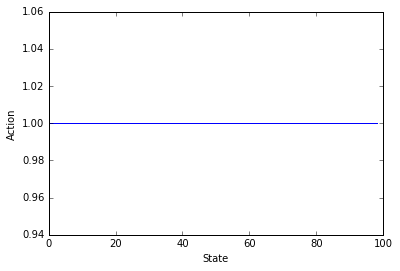

In [570]:
plt.plot(optimalPolicy)
plt.ylabel('Action')
plt.xlabel('State')

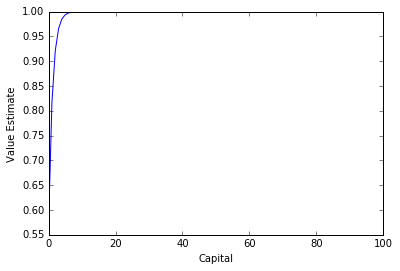

In [571]:
plt.plot(V[1:len(V)-1])
plt.ylabel('Value Estimate')
plt.xlabel('Capital')

In [549]:
probabilities = np.linspace(0,1,11)
optimalPolicies= []
for probability in probabilities:
    coinTossProb = probability
    V,optimalPolicy = valueIterations()
    optimalPolicies.append(optimalPolicy)

1e-20
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1e-20
[0, 1.0902851696326054e-07, 1.0902851696326151e-06, 3.5206127483320169e-06, 1.0902851696326153e-05, 1.9155156769835674e-05, 3.5206127483320166e-05, 0.00010031685514734991, 0.00010902851696

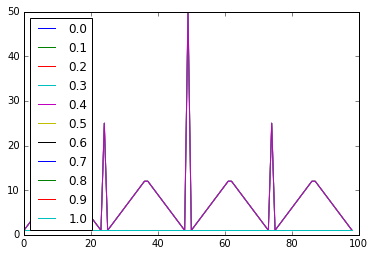

In [551]:
legend = []
for optimalPolicy in optimalPolicies:
    plt.plot(optimalPolicy)

plt.legend(probabilities, loc='upper left')

plt.show()